# Titanic Data Analysis

![Titanic](http://www.history.com/s3static/video-thumbnails/AETN-History_VMS/21/182/History_The_Titanic_Engineering_Disaster_40612_SF_HD_still_624x352.jpg)

The Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912. From Southamption, the ship collided with a iceberg before ever reaching New York City. More than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

This was the second largest ship disaster that shocked the world and certain economic markets.

During an era where ships were a main attraction of land to land tranportation, we can observe the degree of shock 1912 people have felt. 

To understand the emotions of the shocked 1912 era, we immerse ourselves in a pond of Titanic data.
____

## Table of Contents

1. Preliminary Thoughts
2. Titanic Data Acquisition

    a. Importing Data
    
    b. Data Dictionary
3. Questions
4. Data Exploration

    a. Filling in Data
    
    b. Adding Flags
    
5. Exploratory Analysis

    a. Answering Questions
6. Conlusion

____

### Preliminary Thoughts

1. What is the significant factor of being a Titanic survivor?
2. Based on the Titanic movie, was class inequality a real issue?
3. Can we support any additional claims seen from the titanic movie?

________

### Titanic Data Acquisition

#### Importing Data

In [81]:
#Import numpy, pandas, and matplotlib libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

sns.set_style("whitegrid", {'axes.grid' : False})


In [2]:
#Read in csv data as a dataframe titanic
titanic = pd.read_csv("titanic-data.csv")

In [3]:
#Rows, Columns
print("There are",titanic.shape,"rows and columns, respectively") 

There are (891, 12) rows and columns, respectively


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Below, is a description of the Titanic data columns.

#### Data Dictionary

1. PassengerId: ID of a Titanic passenger
2. Survived: Survived:=1  Did not Survive:=0
3. Pclass: There are three passenger classes, where the wealthiest are in 1 and low income passengers are 3.
4. Name: Name of the Titanic Passenger
5. Sex: Male or Female passenger
6. Age: Age of passenger
7. SisSp: # of siblings / spouses aboard the Titanic 
8. Parch: # of parents / children aboard the Titanic
9. Ticket: Passenger's unique ticket ID
10. Fare: Cost of ticket
11. Cabin: Cabin #
12. Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

[Data Dictionary Source](https://www.kaggle.com/c/titanic/data)


__________

### Questions

As a reminder, below is a list of the Titanic data columns

In [5]:
print(list(titanic.columns) )

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Given the available Titanic data columns:

1. Which passenger characteristic should we consider as a predictor of surviving?
    
    a. What about a predictor of not surviving?   

2. What is the average age of a passenger in:
    
    a. the first class?
    
    b. the second class?
    
    c. the third class?
3. If a person survived, how many parents /children did they have?

4. If a person survived, how many siblings /spouses did they have?

5. What features we can validate or disapprove from the Titanic movie?

Before answering the above questions, we need to gauge the quality of the Titanic data. 



### Data Exploration

Let's go ahead and start preparing the data.

#### Data Types

In [6]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We observe:
1. The PassengerId class is an integer. True, but ID's are...id's.
2. Variables to make into classification:

    a. Survived
    
    b. Pclass
    
    c. Sex
    
    d. Embarked
    
Let's look into some basic statistics of this problematic data below

#### Missing Entries

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We should neglect PassengerId in the statisics above. PassengerId is an indentifier for each passenger(row) in our Titanic data set, and by no means a measurement.

Lastly, notice how the Sex and Embarked columns are missing from the above descriptive statistics. We can choose to neglect these features, but we will include them. We include them because they could be significant factors in our analysis. This process will be implemented later.


Let's look at the descriptive statistics without PassengerId column

In [8]:
titanic_columns_without_id = ["Survived","Pclass","Age","SibSp","Parch","Fare","Cabin"]
titanic[titanic_columns_without_id].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We observe the following:
1. Age

    a. The average age of our passengers is 29.69. 
    
    b. 75% of the passengers are 20+.
    
    c. The youngest person was 0.42, or (0.42)(12month/1year)=5.04 months old.
    
2. Fare

    a. The average cost of boarding the Titanic was 32.20

3. The first class tickets ranged enormously in price, from \$150 (about \$1700 today) for a simple berth, up to \$4350 (\$50,000) for one of the two Parlour suites. Second class tickets were \$60 (around \$700) and third class passengers paid between \$15 and \$40 (\$170 - £460). [Source: TitanicFAQ](http://www.jamescamerononline.com/TitanicFAQ.htm)

4. We are missing an estimated **150+** entries in the Age column. This is alarming.

5. We cannot quite make the same assesments of Survived and Pclass because they are category entries, and not numerical entries.
The same applies for the mising Cabin and Embarked Columns

$ $

Going more into the topic of #4, we observe two more columns with missing entries:

In [9]:
#output missing data information
print("The \"Cabin\" column has", len(titanic[titanic["Cabin"].isnull()]), "missing data points. That implies there is",len(titanic)-len(titanic[titanic["Cabin"].isnull()]),"non-null rows")
print("and")
print("The \"Embarked\" column has", len(titanic[titanic["Embarked"].isnull()]), "missing data points. That implies there is",len(titanic)-len(titanic[titanic["Embarked"].isnull()]),"non-null rows")

The "Cabin" column has 687 missing data points. That implies there is 204 non-null rows
and
The "Embarked" column has 2 missing data points. That implies there is 889 non-null rows


The Cabin and Embarked features are missing data--especially the Cabin feature!

Let's visualize the 150+ missing entries in the Age column

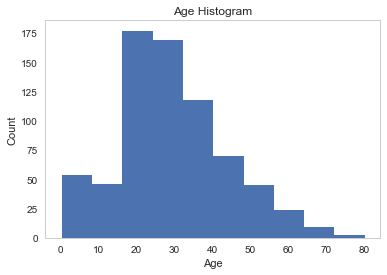

In [10]:
titanic["Age"].hist()
titanic[titanic["Age"].isnull()]["Age"].hist()
plt.title("Age Histogram")
plt.xlabel("Age")
plt.grid(False)
plt.ylabel("Count")
plt.show()

This visualization does not factor in null values. However, we observe that there is a slight right skew towards younger people. 

Is there some signficant factor connected to the missing Age values?

In [11]:
titanic[titanic["Age"].isnull()].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


We observe that is a person does not have an age recorded, they do not have a cabin recorded as well. However, this is no connection by any means. There is a substantial difference in the missing data from the Cabin feature to that of the Age feature.

As a last attemp, we will briefly end this pursuit of information by a quick visualization to notice anything is strange about the missing Age entries.

In [12]:
titanic_missing_age_values = titanic[titanic["Age"].isnull()]


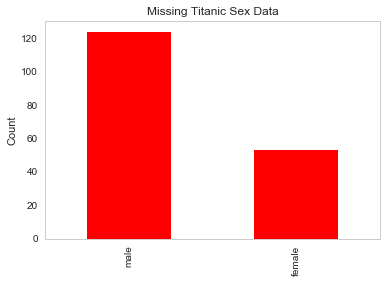

In [13]:
titanic_missing_age_values["Sex"].value_counts().plot(kind ='bar',color='r')
plt.title("Missing Titanic Sex Data")
plt.ylabel("Count")
plt.show()

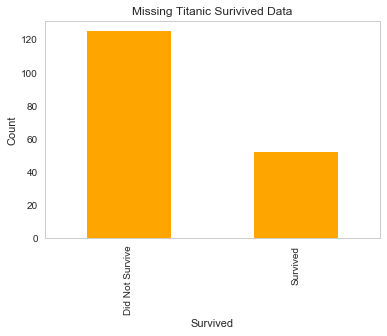

In [14]:
titanic_missing_age_values["Survived"].value_counts().plot(kind ='bar',color='orange')
plt.title("Missing Titanic Surivived Data")
plt.xticks(range(0,2),["Did Not Survive","Survived"],rotation=90)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

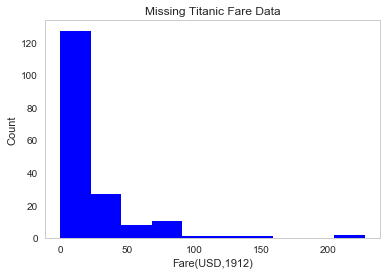

In [15]:
titanic_missing_age_values["Fare"].hist(grid=False,color='b')
plt.title("Missing Titanic Fare Data")
plt.ylabel("Count")
plt.xlabel("Fare(USD,1912)")
plt.show()

For the lost data, we notice these details:

1. There are more male persons missing than female

2. There is more non-survivors missing than survivors.

3. Considering Fare, those who purchased lower-priced ticekts are missing.

Here are my Assumptions for the above observations:

1. Women, elderly, and children were permitted to board lifeboats before men. So, the likelyhood of a male being saved from the iceberg distaster was reduced.

2. If a person did not survive, we can assume it's difficult to record their data--they are missing after all.

3. Though risky to claim, can we assume class inequality as a main factor of surviving? Probably.

#### Filling in Data

Regardless, we need to either take out the missing age values or fill them in.

We choose to fill in the missing Age entries in the Age column

In [16]:
#Fill in missing values by median of Age column
titanic['Age'] = titanic ['Age'].fillna(titanic['Age'].median())
#How many values in Age are null?
print("The amount of null values remaining: ",len(titanic [titanic['Age'].isnull()]) )

The amount of null values remaining:  0


We choose to fill the missing Age values with the median of the Age column to ensure that no outlier effect would occur in our entries, compared to the median.


Now, let's recall the missing entries in the Embarked column.

In [17]:
print(titanic.columns)
titanic["Embarked"].value_counts(dropna=False)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

There appears to be two missing data entries

$ $

What about the Cabin data? Remember the large amount of missing entries? 

Let's implement the same procedure as we did with the Age data.

I.e., let's observe the Cabin feature, and see how we can fill in its information

In [18]:
titanic["Cabin"].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
F33              3
C22 C26          3
D                3
F2               3
E24              2
C78              2
B28              2
C123             2
C83              2
C92              2
D17              2
E25              2
B5               2
C2               2
B35              2
B20              2
C125             2
E8               2
E121             2
C52              2
F G73            2
B18              2
E44              2
B77              2
D26              2
              ... 
E34              1
C30              1
D6               1
A6               1
C82              1
B71              1
C90              1
B79              1
B37              1
C7               1
B41              1
A14              1
B101             1
B42              1
D50              1
D45              1
B80              1
A19              1
F E69            1
B4               1
A16              1
E38         

We assumed that low class individuals were missing from the missing Age data visualization from earlier. Below is the same visualization from above.

These missing passenger were placed in the 3rd class of the Titanic ship. 

$ $

The third class were in decks D through G.

Instead of dropping the values, I propose to randomly fill in the missing cabin values, considering the respective Pclass entry.

I claim to let 1st class passengers be in cabins T,A, and B.

2nd class passengers are in cabins C and D.

3rd class passengers are in E, F, and G.

These claims are adaptations of findings such as the one below.

[Source: Encyclopedia-Titanica](https://www.encyclopedia-titanica.org/cabins.html)

$ $

Now,

let's fill in the missing cabin information

In [19]:
import random

In [20]:
#random_cabin_assignment function that takes in a dataframe
def random_cabin_assignment(dataframe):
    #Cabins by Passenger class
    cabins_3rd = ["E","F","G"]
    cabins_2nd = ["C","D"]
    cabins_1st = ["T","A","B"]
    
    #Go through the dataframe and
    ##randomly classify the missing cabin data
    ###with respect to the Pclass 
    for index, row in dataframe.iterrows():
        #Seperate random generators with respect to Passenger class
        random_index_1st = random.randint(0,2)
        random_index_2nd = random.randint(0,1)
        random_index_3rd = random.randint(0,2)
        
        if (row["Pclass"]==1 and (row["Cabin"] is np.nan)):
            
            row["Cabin"] = cabins_1st[random_index_1st]
            
        elif (row["Pclass"]==2 and (row["Cabin"] is np.nan)):
            
            row["Cabin"]  = cabins_2nd[random_index_2nd]
            
        elif (row["Pclass"]==3 and (row["Cabin"] is np.nan)):
            
            row["Cabin"]  = cabins_3rd[random_index_3rd]
        else:
            pass
            
    return(dataframe)
    

In [21]:
#Fill in cabin data
titanic = random_cabin_assignment(titanic)

In [22]:
titanic["Cabin"].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
F33              3
C22 C26          3
D                3
F2               3
E24              2
C78              2
B28              2
C123             2
C83              2
C92              2
D17              2
E25              2
B5               2
C2               2
B35              2
B20              2
C125             2
E8               2
E121             2
C52              2
F G73            2
B18              2
E44              2
B77              2
D26              2
              ... 
E34              1
C30              1
D6               1
A6               1
C82              1
B71              1
C90              1
B79              1
B37              1
C7               1
B41              1
A14              1
B101             1
B42              1
D50              1
D45              1
B80              1
A19              1
F E69            1
B4               1
A16              1
E38         

In [23]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We observe there are no more missing cabin entries in the Cabin feature of our dataset.

Now, is it justified to place these artificial random entries into our dataset? For the sake of this analysis, yes. With an estimated 1/3 or 1/4 of the dataset, we need to preserve these passenger since they are an estimated 12% of the original Titanic data of 2000+ entries.

I'll elaborate on this topic in the Conclusion section.

$ $

$ $

We now fill in the missing two entries for the Embarked column

In [24]:
titanic[titanic["Embarked"] =="NaN"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Weird, there are no missing Embarked entries, as seen above.

However, the below output indicates there are two missing data points, labeled "NaN"

In [25]:
print(titanic["Embarked"].value_counts(dropna=False) )
print(644+168+77)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
889


For some reason, I see there are no null values in the Embarked column. However, when I look into the types of values using the "value_counts" function, there are two null values.

This contradiction is probably from a function mishap.

Therefore, we move on with confidence the Embarked column has no null values.


#### Adding Flags and Classifier Columns

We have filled in missing data point in our Titanic dataset.

Now, we would like to add flags and classifier columns with respect
to existing columns.


What is the motivation behind these upcoming actions?

Well, these flags and classifiers allow us to analyze the categorical data would had not been
able to interact with earlier.

In [26]:
#age_classifier functiont that takes in parameter age_entry
##Case by case assignment
def age_classifier(age_entry):
    stage_of_age= None
    if age_entry>=0.0 and age_entry <5.0:
        stage_of_age = "Toddler"
    elif age_entry>=5.1 and age_entry <12.9:
        stage_of_age = "Child"
    elif age_entry>=13.0 and age_entry <19.9:
        stage_of_age = "Teen"
    elif age_entry>=20.0 and age_entry <39.9:
        stage_of_age = "Adult"
    elif age_entry>=40.0 and age_entry <59.9:
        stage_of_age = "Middle Aged"
    elif age_entry>=60.0 and age_entry <200.0:
        stage_of_age = "Elderly"
    else:
        stage_of_age = np.nan
    return(stage_of_age)

In [27]:
#Create classifier column AgeGroup from the Age column
titanic["AgeGroup"]= titanic["Age"].apply(age_classifier)

In [28]:
#sex_flag function that takes in sex(Male or Female) data entry
def sex_flag(sex_entry):
    sex_flag = None
    if sex_entry =="male":
        sex_flag = 0
    else:
        sex_flag = 1
    return(sex_flag)

In [29]:
#Create flag column from the existing Titanic Sex column
titanic["Sex_Flag"] = titanic["Sex"].apply(sex_flag)

In [30]:
def embarked_flag(embarked_entry):
    embarked_flag = None
    if (embarked_entry=="S"):
        embarked_flag = 0
    elif (embarked_entry=="C"):
        embarked_flag = 1
    else:
        embarked_flag = 2
    return(embarked_flag)

In [31]:
titanic["Embarked_Flag"] = titanic["Embarked"].apply(embarked_flag)

We observe three new features in our dataset.

Particulary, we have added the "AgeGroup", "Sex_Flag," and "Embarked_Flag" columns from the Age, Sex, and Embarked columns, respectively

In [32]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Sex_Flag,Embarked_Flag
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,0,2


### Exploratory Analysis

As a reminder, we need to answer the following questions:
1. Which passenger characteristic should we consider as a predictor of surviving?
    
    a. What about a predictor of not surviving?   

2. What is the average age of a passenger in:
    
    a. the first class?
    
    b. the second class?
    
    c. the third class?
3. If a person survived, how many parents /children did they have?

4. If a person survived, how many siblings /spouses did they have?

5. What features we can validate or disapprove from the Titanic movie? 
   

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Sex_Flag,Embarked_Flag
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0


In [34]:
list(titanic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'AgeGroup',
 'Sex_Flag',
 'Embarked_Flag']

Again, we observe the basic statistics for our Titanic data.

In [35]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.352413,0.365881
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.640157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


_Notice the Sex Flag and Embarked Flag columns added to our analysis. Awesome!_

Now, let's just visualize a few columns...

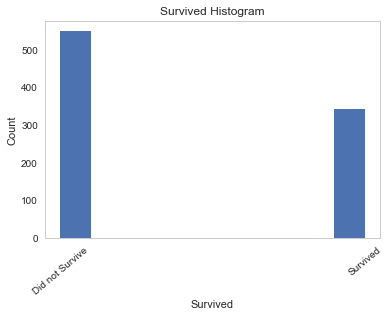

We observe that a higher amount of people didn't survive the deadly Titanic incident. 
 Of course, we anticipated a high amount of deaths


In [65]:
#Visualizing the Survived column
titanic["Survived"].hist(grid=False)
plt.title("Survived Histogram")
plt.xticks(range(0,2),["Did not Survive","Survived"],rotation=40)
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()
print("We observe that a higher amount of people didn't survive the deadly Titanic incident. \n Of course, we anticipated a high amount of deaths")

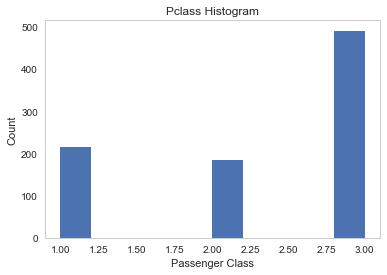

There were a higher amount of 3rd class passengers than 2nd and 1st class passengers.
Should we anticipate more deaths in 3rd class passenger than any other class


In [67]:
#Visualzing the Pclass column
titanic["Pclass"].hist(grid=False)
plt.title("Pclass Histogram")
plt.ylabel("Count")
plt.xlabel("Passenger Class")
plt.show()
print("There were a higher amount of 3rd class passengers than 2nd and 1st class passengers.\nShould we anticipate more deaths in 3rd class passenger than any other class")

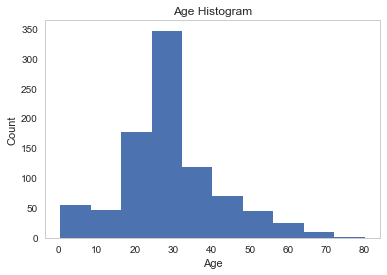

We observe a slight right skew of the age data


In [68]:
titanic["Age"].hist(grid=False)
plt.title("Age Histogram")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()
print("We observe a slight right skew of the age data")

This distribution, though skew, does display the average age of a Titanic passenger to be around 30. Moreover, there is a steep declin in aged individuals after the age group 40.

Should we consider than younger individuals were more likely to board the ship to find a home in America? 

Should we consider that maybe the average age in 1912 was around 40, and it was rare to live past even 50? I.e. the [life expectancy in 1912](http://u.demog.berkeley.edu/~andrew/1918/figure2.html) was less than that of the life expectancy in 2017?

#### Which passenger characteristic should we consider as a predictor of surviving?

In [40]:
#list of column names without the PassengerID column
titanic_columns_no_id = list(titanic.columns)[1:]
titanic_columns_no_id_and_no_fare = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'AgeGroup', 'Sex_Flag', 'Embarked_Flag']
titanic_columns_no_id_and_no_fare_no_age = ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'AgeGroup', 'Sex_Flag', 'Embarked_Flag']
print(titanic_columns_no_id)

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'Sex_Flag', 'Embarked_Flag']


To answer the above question, we group the titanic data by the Survived column. 

Thereafter, we visualize this grouped data

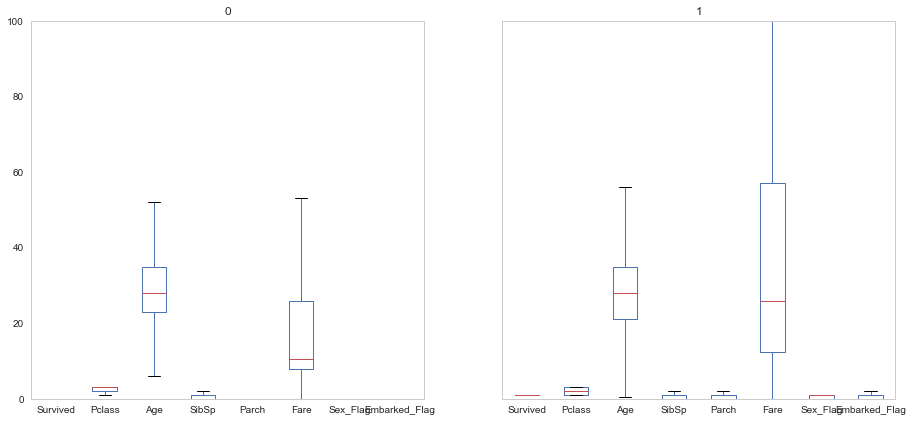

This is a boxplot of several features in our titanic dataset.
We should zoom in by taking out the larger sized Fare feature


In [70]:
titanic[titanic_columns_no_id].groupby("Survived").boxplot(grid = False, figsize=[15,7])
plt.ylim([0,100])
plt.show()
print("This is a boxplot of several features in our titanic dataset.\nWe should zoom in by taking out the larger sized Fare feature")

However, first let's look out the Fare column boxplot before neglecting it.

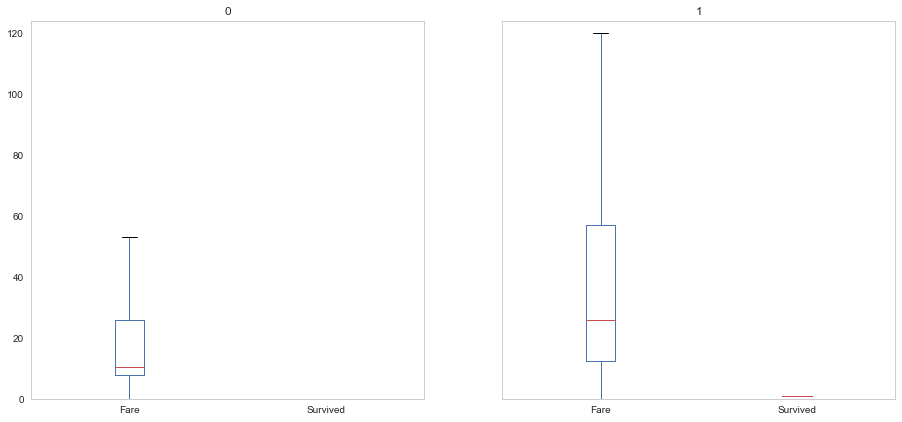

In [72]:
titanic[["Fare","Survived"]].groupby("Survived").boxplot(grid = False, figsize=[15,7])
plt.ylim(0,124)
plt.show()

Hmm, if you were to survive, you possibly paid for a more expensive ticket. This can be largely seen in the outlier of the surivived boxplot information. 
      
      Note that paying a higher ticket price does not mean you are guaranteed to leave. Maybe
      first and second class persons had more access to lifeboats than third class individuals

Now, we observe several Titanic feature non-Fare boxplots with respect to Survived column.

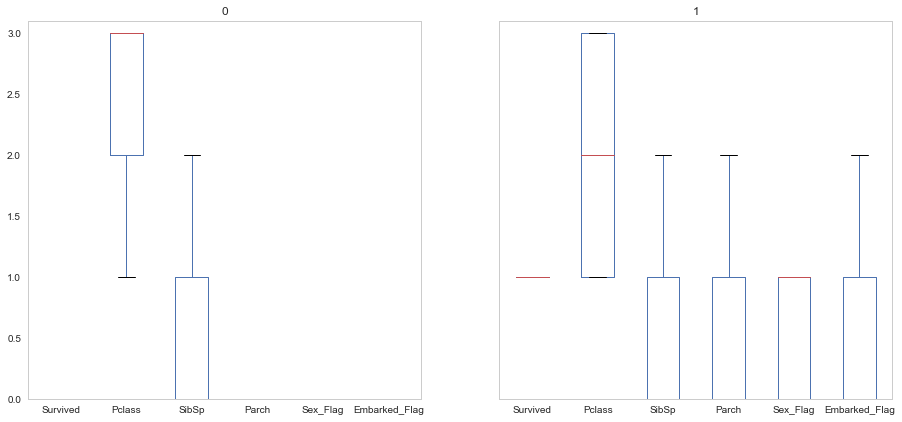

In [76]:
titanic[titanic_columns_no_id_and_no_fare_no_age].groupby("Survived").boxplot(grid = False, figsize=[15,7])
plt.ylim(0,3.1)
plt.show()

If you were to not survive, your class was higher. Hmm, interesting.


And if you were to survive, you were on average in the second and first class.

Let's observe some correlation tables to determine an explicit factor in surviving the Titanic incident.

In [44]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939,-0.030254
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,0.114954
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.034393
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.002028
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.062871
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.081437
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,0.068459
Sex_Flag,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,0.125265
Embarked_Flag,-0.030254,0.114954,0.034393,0.002028,-0.062871,-0.081437,0.068459,0.125265,1.000000


Looking at the Survived feature row/column, the interesting feature that is correlated with it is the Sex Flag column

Let's group by the Survived column, and again explore the correlation table. This breakdown allows us to further investigate any additional significant features and confirm the above claim.

In [45]:
titanic[titanic_columns_no_id].groupby("Survived").corr()

Age  Embarked_Flag      Fare     Parch    Pclass  \
Survived                                                                        
0        Age            1.000000       0.009230  0.071777 -0.082840 -0.394175   
         Embarked_Flag  0.009230       1.000000  0.016294 -0.038292  0.052412   
         Fare           0.071777       0.016294  1.000000  0.347307 -0.517378   
         Parch         -0.082840      -0.038292  0.347307  1.000000  0.068482   
         Pclass        -0.394175       0.052412 -0.517378  0.068482  1.000000   
         Sex_Flag      -0.145294       0.017114  0.012026  0.357817  0.181080   
         SibSp         -0.290020      -0.060676  0.282108  0.477940  0.125714   
1        Age            1.000000       0.010047  0.159509 -0.302145 -0.374875   
         Embarked_Flag  0.010047       1.000000  0.061761 -0.178205  0.112073   
         Fare           0.159509       0.061761  1.000000  0.116519 -0.538125   
         Parch         -0.302145      -0.178205  0.116519  1.000000  0.021584   
         Pclass        -0.374875       0.112073 -0.538125  0.021584  1.000000   
         Sex_Flag       0.045242       0.142997  0.077900  0.095074 -0.053997   
         SibSp         -0.135522      -0.064922  0.122886  0.282498 -0.033300   

                        Sex_Flag     SibSp  
Survived                                    
0        Age           -0.145294 -0.290020  
         Embarked_Flag  0.017114 -0.060676  
         Fare           0.012026  0.282108  
         Parch          0.357817  0.477940  
         Pclass         0.181080  0.125714  
         Sex_Flag       1.000000  0.212062  
         SibSp          0.212062  1.000000  
1        Age            0.045242 -0.135522  
         Embarked_Flag  0.142997 -0.064922  
         Fare           0.077900  0.122886  
         Parch          0.095074  0.282498  
         Pclass        -0.053997 -0.033300  
         Sex_Flag       1.000000  0.085406  
         SibSp          0.085406  1.000000

Well, if you survived and factor in your sexual identity, there isn't any additional contributions to surviving.

Therefore, the main factor to survive in the titanic was the sexual identity of the passenger. And certaintly this is true.

In the titanic movie, we saw women and children boarded lifeboats first. At least we confirmed that!

##### What about a predictor of not surviving?   

In [78]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939,-0.030254
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,0.114954
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.034393
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.002028
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.062871
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.081437
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,0.068459
Sex_Flag,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,0.125265
Embarked_Flag,-0.030254,0.114954,0.034393,0.002028,-0.062871,-0.081437,0.068459,0.125265,1.000000


We look at the observed column or row. If you did not survive, the most significant factor of not surviving was which class you were in. Hmm...

In [77]:
titanic[titanic_columns_no_id].groupby("Survived").corr()

Age  Embarked_Flag      Fare     Parch    Pclass  \
Survived                                                                        
0        Age            1.000000       0.009230  0.071777 -0.082840 -0.394175   
         Embarked_Flag  0.009230       1.000000  0.016294 -0.038292  0.052412   
         Fare           0.071777       0.016294  1.000000  0.347307 -0.517378   
         Parch         -0.082840      -0.038292  0.347307  1.000000  0.068482   
         Pclass        -0.394175       0.052412 -0.517378  0.068482  1.000000   
         Sex_Flag      -0.145294       0.017114  0.012026  0.357817  0.181080   
         SibSp         -0.290020      -0.060676  0.282108  0.477940  0.125714   
1        Age            1.000000       0.010047  0.159509 -0.302145 -0.374875   
         Embarked_Flag  0.010047       1.000000  0.061761 -0.178205  0.112073   
         Fare           0.159509       0.061761  1.000000  0.116519 -0.538125   
         Parch         -0.302145      -0.178205  0.116519  1.000000  0.021584   
         Pclass        -0.374875       0.112073 -0.538125  0.021584  1.000000   
         Sex_Flag       0.045242       0.142997  0.077900  0.095074 -0.053997   
         SibSp         -0.135522      -0.064922  0.122886  0.282498 -0.033300   

                        Sex_Flag     SibSp  
Survived                                    
0        Age           -0.145294 -0.290020  
         Embarked_Flag  0.017114 -0.060676  
         Fare           0.012026  0.282108  
         Parch          0.357817  0.477940  
         Pclass         0.181080  0.125714  
         Sex_Flag       1.000000  0.212062  
         SibSp          0.212062  1.000000  
1        Age            0.045242 -0.135522  
         Embarked_Flag  0.142997 -0.064922  
         Fare           0.077900  0.122886  
         Parch          0.095074  0.282498  
         Pclass        -0.053997 -0.033300  
         Sex_Flag       1.000000  0.085406  
         SibSp          0.085406  1.000000

Again, if we partition the data by the Survived feature, we observe that Pclass is a significant factor in not surviving.

##### What is the average age and fare for each class?

In [46]:
titanic_group_by_pclass = titanic.groupby("Pclass")

In [47]:
titanic_group_by_pclass.aggregate(np.mean)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
Pclass,,,,,,,,
1,461.597222,0.629630,36.812130,0.416667,0.356481,84.154687,0.435185,0.430556
2,445.956522,0.472826,29.765380,0.402174,0.380435,20.662183,0.413043,0.125000
3,439.154786,0.242363,25.932627,0.615071,0.393075,13.675550,0.293279,0.427699


We observe the means of each class with respect to each column are different than that of the nongrouped data "titanic"

In [48]:
titanic.mean()

PassengerId      446.000000
Survived           0.383838
Pclass             2.308642
Age               29.361582
SibSp              0.523008
Parch              0.381594
Fare              32.204208
Sex_Flag           0.352413
Embarked_Flag      0.365881
dtype: float64

The average fare and age information for:

1. 1st Class:

    a. $\bar{Fare} = 84.15$
    
    b. $\bar{Age} = 36.81 $
2. 2nd Class:

    a. $\bar{Fare} = 20.6$
    
    b. $\bar{Age} = 29.76 $
3. 3rd Class:

    a. $\bar{Fare} = 13.67$
    
    b. $\bar{Age} = 25.93 $

##### If a passenger survived, how many parents/children and siblings/spouses did they have?

We group the data by the survived column.

In [49]:
titanic_group_by_survived = titanic.groupby("Survived")

Considering the Survived column, the following sums for several Titanic features are:

In [50]:
titanic_group_by_survived.aggregate(np.sum)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
Survived,,,,,,,,
0,245412,1390,16485.50,304,181,12142.7199,81,169
1,151974,667,9675.67,162,159,16551.2294,233,157


Considering the Survived column, the following means for several Titanic features are:

In [51]:
titanic_survived_agg_mean=titanic_group_by_survived.aggregate(np.mean)
titanic_survived_agg_mean

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
Survived,,,,,,,,
0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887,0.147541,0.307832
1,444.368421,1.950292,28.291433,0.473684,0.464912,48.395408,0.681287,0.459064


Hmmm, if you survived, you were more likely in  a higher class. There's another output to validate the previous question.

If you survived, you had a more parents and had less siblings.

$ $

Let's look into the Parch column, if you survived.

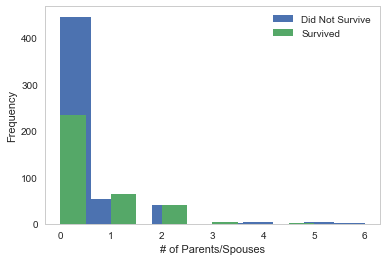

If you did not survive, you had less parents/spouses. And if you did survive, you had more parents/spouses.

Are these surivivors children or just younger to those who did not survive?


In [79]:
titanic_group_by_survived["Parch"].plot(kind='hist',legend=True)
plt.xlabel("# of Parents/Spouses")
plt.legend(labels=["Did Not Survive","Survived"])
plt.show()
print("If you did not survive, you had less parents/spouses. And if you did survive, you had more parents/spouses.\n\nAre these surivivors children or just younger to those who did not survive?")

Is the above data displayed correctly?

In [80]:

#Confirmationt that the green labeled data, above, is Survived data
temp_list = list(titanic_group_by_survived["Parch"].get_group(0))
count = 0
for item in temp_list:
    if item ==0:
        count+=1
print(count,"are nonsurvivors that have no parents")

445 are nonsurvivors that have no parents


Awesome, the above graph is correct.

Now, let's look into the SibSp column of our grouped Titanic data by the Surivived column

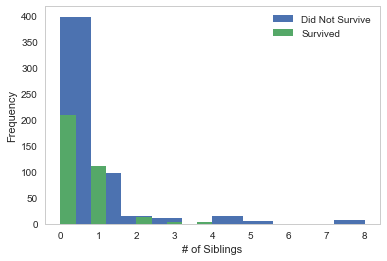

In [54]:
titanic_group_by_survived["SibSp"].plot(kind='hist',legend=True)
plt.xlabel("# of Siblings")
plt.legend(labels=["Did Not Survive","Survived"])
plt.show()

We observe that potentially the less siblings you had, the more likely you were able to survive

#### Additional Questions

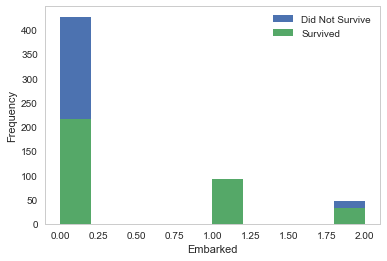

In [55]:
titanic_group_by_survived["Embarked_Flag"].plot(kind='hist',legend=True)
plt.xlabel("Embarked")
plt.legend(labels=["Did Not Survive","Survived"])
plt.show()

We observe:
    
    Considering the three embarked locations C = Cherbourg, Q = Queenstown, S = Southampton, S=Southampton had the most that did not survive. Why though?
    
Let's look at Pclass against embarked locations

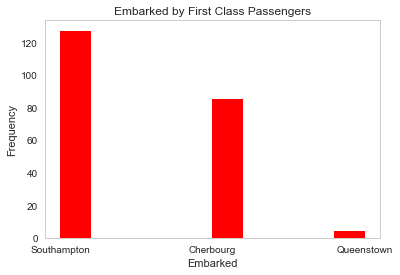

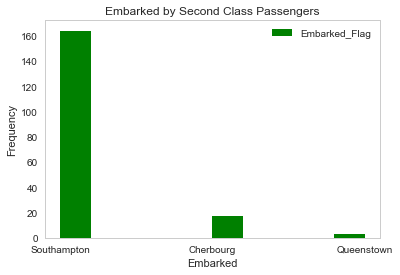

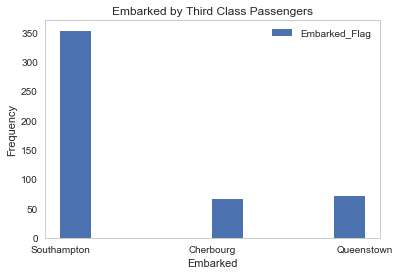

In [56]:
labels=["Southampton","Cherbourg","Queenstown"]
titanic_group_by_pclass["Embarked_Flag"].get_group(1).plot(kind='hist',legend=False,color='r')
plt.title("Embarked by First Class Passengers")
plt.xticks(range(0,3),labels,rotation=0)
plt.xlabel("Embarked")
plt.show()

titanic_group_by_pclass["Embarked_Flag"].get_group(2).plot(kind='hist',legend=True,color='g')
plt.title("Embarked by Second Class Passengers")
plt.xticks(range(0,3),labels,rotation=0)
plt.xlabel("Embarked")
plt.show()

titanic_group_by_pclass["Embarked_Flag"].get_group(3).plot(kind='hist',legend=True)
plt.xticks(range(0,3),labels,rotation=0)
plt.title("Embarked by Third Class Passengers")
plt.xlabel("Embarked")
plt.show()

In [57]:
titanic_group_by_survived_and_pclass = titanic.groupby(["Survived","Pclass"])

In [58]:
titanic_group_by_survived_and_pclass.aggregate(np.mean)

PassengerId        Age     SibSp     Parch       Fare  \
Survived Pclass                                                          
0        1        410.300000  40.556250  0.287500  0.300000  64.684008   
         2        452.123711  33.144330  0.319588  0.144330  19.412328   
         3        453.580645  26.951613  0.672043  0.384409  13.669364   
1        1        491.772059  34.609706  0.492647  0.389706  95.608029   
         2        439.080460  25.998046  0.494253  0.643678  22.055700   
         3        394.058824  22.747227  0.436975  0.420168  13.694887   

                 Sex_Flag  Embarked_Flag  
Survived Pclass                           
0        1       0.037500       0.350000  
         2       0.061856       0.103093  
         3       0.193548       0.352151  
1        1       0.669118       0.477941  
         2       0.804598       0.149425  
         3       0.605042       0.663866

In [59]:
titanic_group_by_survived_and_pclass.aggregate(np.sum)

PassengerId       Age  SibSp  Parch        Fare  Sex_Flag  \
Survived Pclass                                                              
0        1             32824   3244.50     23     24   5174.7206         3   
         2             43856   3215.00     31     14   1882.9958         6   
         3            168732  10026.00    250    143   5085.0035        72   
1        1             66881   4706.92     67     53  13002.6919        91   
         2             38200   2261.83     43     56   1918.8459        70   
         3             46893   2706.92     52     50   1629.6916        72   

                 Embarked_Flag  
Survived Pclass                 
0        1                  28  
         2                  10  
         3                 131  
1        1                  65  
         2                  13  
         3                  79

In [60]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Flag,Embarked_Flag
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939,-0.030254
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,0.114954
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.034393
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.002028
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.062871
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.081437
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,0.068459
Sex_Flag,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,0.125265
Embarked_Flag,-0.030254,0.114954,0.034393,0.002028,-0.062871,-0.081437,0.068459,0.125265,1.000000


Most passengers were from Southampton. But note that for every class, there were more people that were from Southampton, and died.

We were focusing so much on class inequality that we forgot to consider...maybe Southampton was a larger hub for people to board or Southampton was a large city!

### Conclusion:

We observed that if a passenger were to survive during the Titanic incident, they would have to have the right sexual indentity. Particulary, if they were a women, they were more likely to survive. 

A factor that lead to not surviving was what passenger class a passenger was from. If the passenger was from the third class, they had a lower chance of surviving. Moreover, if a passenger was fromt the second class, they were likely to not survive, but not as significant as the third class individuals.

The average fare and age information for:

    1. 1st Class:

        a. Fare = 84.15
    
        b. Age = 36.81 
    2. 2nd Class:

        a. Fare = 20.6
    
        b. Age = 29.76 
    3. 3rd Class:

        a. Fare = 13.67
    
        b. Age = 25.93 
If a person survived, an estimated 0-1 parent was likely.

Similarly, if a person survived, they had 0-1 siblings /spouses.

Lastly, what was cool is we got a some snippets of class inequality, but could not have proven the existence of such discrimination in the event of trying to live.

But we got to observe that:
1. Most passengers were from Southampton
2. The average age was 29
3. More women and children did in fact survive than any other group of individuals
4. Tickets were costly back then. And for a 3rd class passenger, this was certainly no casual trip.

### Limitations

**Filling in Missing Data**

How to deal with missing data is an important.

Typically, we will use other characteristics related to the observation for which there is a missing value to try to impute the value of the missing data, and we did.


Earlier we filled in missing data without doing a proper analysis to justify our claim. I.e., we assumed poor people were in the missing cabin data given that of these missing people, most of them purchased cheaper tickets. But looking into the respective Pclass feature, we had a higher degree of confidence in randomly filing in the missing Cabin data.


**Adding Flags**

We added flags to few of the categorical data to incorporate them in our analysis. And indeed, we found some insights into the Sexual identity and Embarked columns. 

However, we are unsure that we were able to produce several more flags and efficient techniques to creating these flags.

**Neglection**

Though we investigated, we neglected the two unfound null values in the "Embarked" column. This issue would have been more problematic if there were more values missing, like what had happened to the Embarked feature situation.

**Limitations**

We were unable to perform higher statistical analysis

We were unable to validate the significance of correlations in our analysis.

We were unable to propose any other generalizations in the Titanic dataset

if you want to read any other interesting Titanic information, you can go to this random [buzzfeed article](https://www.buzzfeed.com/mjs538/things-you-didnt-know-about-titanic?utm_term=.cm6bvEGP54#.dpPwRDrNdl) I found.

### Thank you for reading!